# Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import pyarrow
import openpyxl
import re
import seaborn as sns


# Load Data

In [2]:
# Encoding of the CSV-Files:
! file -i "_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv"
! file -i "_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv"

_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv: text/csv; charset=us-ascii
_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv: text/csv; charset=us-ascii


In [3]:
# Read data and meta data
data_pdf = pd.read_csv('_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv', encoding='us-ascii', sep=',', decimal='.')
# meta_data_pdf = pd.read_csv('_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv', encoding='us-ascii', sep=',', delimiter='.'))

# Explore Data

In [4]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   14632 non-null  object
 1   Country Code   14630 non-null  object
 2   Series Name    14630 non-null  object
 3   Series Code    14630 non-null  object
 4   1960 [YR1960]  14630 non-null  object
 5   1961 [YR1961]  14630 non-null  object
 6   1962 [YR1962]  14630 non-null  object
 7   1963 [YR1963]  14630 non-null  object
 8   1964 [YR1964]  14630 non-null  object
 9   1965 [YR1965]  14630 non-null  object
 10  1966 [YR1966]  14630 non-null  object
 11  1967 [YR1967]  14630 non-null  object
 12  1968 [YR1968]  14630 non-null  object
 13  1969 [YR1969]  14630 non-null  object
 14  1970 [YR1970]  14630 non-null  object
 15  1971 [YR1971]  14630 non-null  object
 16  1972 [YR1972]  14630 non-null  object
 17  1973 [YR1973]  14630 non-null  object
 18  1974 [YR1974]  14630 non-n

In [5]:
data_pdf.tail()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
14630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14633,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14634,Last Updated: 01/28/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_pdf.describe()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
count,14632,14630,14630,14630,14630,14630,14630,14630,14630,14630,...,14630,14630,14630,14630,14630,14630,14630,14630,14630,14630
unique,268,266,55,55,1548,2252,2289,2326,2342,2463,...,10240,9610,9209,9358,9148,9173,9049,8917,7005,4949
top,World,WLD,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,55,55,266,266,12758,12291,12239,12212,12189,11809,...,3699,4356,4784,4635,4855,4836,4990,5117,7103,9570


In [7]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   14632 non-null  object
 1   Country Code   14630 non-null  object
 2   Series Name    14630 non-null  object
 3   Series Code    14630 non-null  object
 4   1960 [YR1960]  14630 non-null  object
 5   1961 [YR1961]  14630 non-null  object
 6   1962 [YR1962]  14630 non-null  object
 7   1963 [YR1963]  14630 non-null  object
 8   1964 [YR1964]  14630 non-null  object
 9   1965 [YR1965]  14630 non-null  object
 10  1966 [YR1966]  14630 non-null  object
 11  1967 [YR1967]  14630 non-null  object
 12  1968 [YR1968]  14630 non-null  object
 13  1969 [YR1969]  14630 non-null  object
 14  1970 [YR1970]  14630 non-null  object
 15  1971 [YR1971]  14630 non-null  object
 16  1972 [YR1972]  14630 non-null  object
 17  1973 [YR1973]  14630 non-null  object
 18  1974 [YR1974]  14630 non-n

# Data Preparation

## Extract the Countries

Obviously there are also regions reflected in the data and not only countries. Added the pycountry package to extract countries from the dataframe.

In [8]:
# Extract alpha-3 country codes
alpha_3_codes_list = [country.alpha_3 for country in pycountry.countries]

alpha_3_codes_set = set(alpha_3_codes_list)

len(alpha_3_codes_set)

249

In [9]:
data_onlycountries_pdf = data_pdf[data_pdf['Country Code'].isin(alpha_3_codes_list)]

In [10]:
data_onlycountries_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825 entries, 0 to 11934
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   11825 non-null  object
 1   Country Code   11825 non-null  object
 2   Series Name    11825 non-null  object
 3   Series Code    11825 non-null  object
 4   1960 [YR1960]  11825 non-null  object
 5   1961 [YR1961]  11825 non-null  object
 6   1962 [YR1962]  11825 non-null  object
 7   1963 [YR1963]  11825 non-null  object
 8   1964 [YR1964]  11825 non-null  object
 9   1965 [YR1965]  11825 non-null  object
 10  1966 [YR1966]  11825 non-null  object
 11  1967 [YR1967]  11825 non-null  object
 12  1968 [YR1968]  11825 non-null  object
 13  1969 [YR1969]  11825 non-null  object
 14  1970 [YR1970]  11825 non-null  object
 15  1971 [YR1971]  11825 non-null  object
 16  1972 [YR1972]  11825 non-null  object
 17  1973 [YR1973]  11825 non-null  object
 18  1974 [YR1974]  11825 non-null  

How many countries are in the data?

In [11]:
countries_in_data_list = list(data_onlycountries_pdf['Country Code'])

countries_in_data_set = set(countries_in_data_list)

len(countries_in_data_set)

215

Which countries are missing?

In [12]:
missing_countries = alpha_3_codes_set - countries_in_data_set

print(missing_countries)

{'REU', 'SJM', 'GGY', 'BVT', 'BLM', 'CXR', 'NIU', 'WLF', 'VAT', 'JEY', 'GLP', 'ATA', 'MSR', 'PCN', 'SHN', 'TKL', 'AIA', 'CCK', 'NFK', 'GUF', 'TWN', 'ALA', 'FLK', 'BES', 'IOT', 'ESH', 'HMD', 'SPM', 'MTQ', 'UMI', 'SGS', 'MYT', 'COK', 'ATF'}


## Convert Data to Numeric Values

In [13]:
# Convert values in year columns to numeric values

# Determine columns with years
data_columns_list = list(data_onlycountries_pdf.columns)
data_columns_year_list = [column for column in data_columns_list if re.fullmatch(r"^\d{4} \[YR\d{4}\]$", column)]

data_onlycountries_pdf[data_columns_year_list] = data_onlycountries_pdf[data_columns_year_list].apply(pd.to_numeric, errors='coerce')
# data_onlycountries_pdf['1960 [YR1960]'] = pd.to_numeric(data_onlycountries_pdf['1960 [YR1960]'], errors='coerce')

/tmp/ipykernel_47970/214051053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_onlycountries_pdf[data_columns_year_list] = data_onlycountries_pdf[data_columns_year_list].apply(pd.to_numeric, errors='coerce')


## Drop Unnecessary Columns and Choose Time Span

Drop Years Before 1980 and After 2020, because they are only sparsely filled. 

In [14]:
data_columns_drop_list = data_columns_list[20:-3]
data_columns_selected_list = data_columns_list[0:3] + data_columns_list[37:]
data_columns_selected_list

['Country Name',
 'Country Code',
 'Series Name',
 '1993 [YR1993]',
 '1994 [YR1994]',
 '1995 [YR1995]',
 '1996 [YR1996]',
 '1997 [YR1997]',
 '1998 [YR1998]',
 '1999 [YR1999]',
 '2000 [YR2000]',
 '2001 [YR2001]',
 '2002 [YR2002]',
 '2003 [YR2003]',
 '2004 [YR2004]',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]',
 '2008 [YR2008]',
 '2009 [YR2009]',
 '2010 [YR2010]',
 '2011 [YR2011]',
 '2012 [YR2012]',
 '2013 [YR2013]',
 '2014 [YR2014]',
 '2015 [YR2015]',
 '2016 [YR2016]',
 '2017 [YR2017]',
 '2018 [YR2018]',
 '2019 [YR2019]',
 '2020 [YR2020]',
 '2021 [YR2021]',
 '2022 [YR2022]',
 '2023 [YR2023]']

In [15]:
data_pdf = data_onlycountries_pdf[data_columns_selected_list]

data_pdf

,Country Name,Country Code,Series Name,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.610000e+01,2.760000e+01,2.880000e+01,3.030000e+01,3.140000e+01,3.260000e+01,3.380000e+01,3.490000e+01,3.610000e+01,NaN
1,Afghanistan,AFG,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.950000e+01,7.150000e+01,9.770000e+01,9.770000e+01,9.340000e+01,9.770000e+01,9.770000e+01,9.770000e+01,8.530000e+01,NaN
2,Afghanistan,AFG,"Educational attainment, at least Bachelor's or...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.911332e+00,NaN,NaN,5.261417e+00,NaN,NaN,4.323430e+00,3.070000e+00,3.984250e+00,NaN
3,Afghanistan,AFG,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.528878e+00,1.010535e+01,1.181859e+01,1.262082e+01,1.420842e+01,1.483132e+01,1.553361e+01,2.182795e+01,NaN,NaN
4,Afghanistan,AFG,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.250549e+02,5.655697e+02,5.220822e+02,5.254698e+02,4.913372e+02,4.966025e+02,5.107871e+02,3.564962e+02,3.572612e+02,4.157074e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,Zimbabwe,ZWE,"Manufacturing, value added (current US$)",1.379790e+09,1.313006e+09,1.369931e+09,1.427158e+09,1.354383e+09,922913800.0,905350700.0,...,2.454635e+09,2.373335e+09,2.382829e+09,7.164196e+09,4.671914e+09,3.657623e+09,4.217343e+09,3.389519e+09,6.732872e+09,5.788328e+09
11931,Zimbabwe,ZWE,Military expenditure (% of general government ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.232506e+00,9.193971e+00,7.363048e+00,5.542350e+00,5.607096e+00,5.504620e+00,6.872332e+00,7.722033e+00,4.896716e+00,1.380527e+00
11932,Zimbabwe,ZWE,Military expenditure (current LCU),2.498000e+08,2.479000e+08,2.629000e+08,2.916500e+08,3.114000e+08,NaN,263400000.0,...,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,1.367348e+09,1.186680e+10,4.312902e+10,1.124585e+11,3.262385e+11
11933,Zimbabwe,ZWE,Military expenditure (current USD),2.498000e+08,2.479000e+08,2.629000e+08,2.916500e+08,3.114000e+08,NaN,263400000.0,...,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,5.469390e+08,2.421796e+08,4.739453e+08,3.327173e+08,8.704335e+08


## Select Three Countries

In [16]:
data_pdf = data_pdf[data_pdf['Country Name'].isin(['Germany', 'France', 'United States'])]

data_pdf

,Country Name,Country Code,Series Name,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3740,France,FRA,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
3741,France,FRA,Access to electricity (% of population),1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
3742,France,FRA,"Educational attainment, at least Bachelor's or...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.639000e+01,1.766000e+01,1.740000e+01,1.800000e+01,1.922301e+01,1.970000e+01,2.097878e+01,2.293775e+01,2.255778e+01,2.435462e+01
3743,France,FRA,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.153937e+01,1.144817e+01,1.147060e+01,1.135469e+01,1.120799e+01,1.108886e+01,1.213096e+01,1.230787e+01,NaN,NaN
3744,France,FRA,GDP per capita (current US$),2.223883e+04,2.335990e+04,2.679182e+04,2.675764e+04,2.416940e+04,2.486940e+04,2.457632e+04,...,4.314805e+04,3.670243e+04,3.702422e+04,3.868716e+04,4.141818e+04,4.040828e+04,3.916986e+04,4.372510e+04,4.108281e+04,4.469093e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,United States,USA,"Manufacturing, value added (current US$)",NaN,NaN,NaN,NaN,1.379886e+12,1.429598e+12,1.488890e+12,...,2.045615e+12,2.123243e+12,2.098272e+12,2.192925e+12,2.330107e+12,2.364316e+12,2.238531e+12,2.497132e+12,NaN,NaN
11381,United States,USA,Military expenditure (% of general government ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.041803e+01,9.892660e+00,9.626809e+00,9.367407e+00,9.349505e+00,9.549711e+00,8.246694e+00,8.038668e+00,9.323326e+00,9.055287e+00
11382,United States,USA,Military expenditure (current LCU),3.167194e+11,3.080840e+11,2.958531e+11,2.879607e+11,2.931678e+11,2.909961e+11,2.980949e+11,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11
11383,United States,USA,Military expenditure (current USD),3.167194e+11,3.080840e+11,2.958531e+11,2.879607e+11,2.931678e+11,2.909961e+11,2.980949e+11,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11


## Drop All NaN Values

In [17]:
data_pdf = data_pdf.dropna()

data_pdf

,Country Name,Country Code,Series Name,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3744,France,FRA,GDP per capita (current US$),2.223883e+04,2.335990e+04,2.679182e+04,2.675764e+04,2.416940e+04,2.486940e+04,2.457632e+04,...,4.314805e+04,3.670243e+04,3.702422e+04,3.868716e+04,4.141818e+04,4.040828e+04,3.916986e+04,4.372510e+04,4.108281e+04,4.469093e+04
3745,France,FRA,Gross domestic savings (% of GDP),2.120204e+01,2.177738e+01,2.213475e+01,2.135551e+01,2.235131e+01,2.321081e+01,2.347429e+01,...,2.112083e+01,2.159884e+01,2.125152e+01,2.140922e+01,2.164528e+01,2.237520e+01,2.107997e+01,2.223510e+01,2.140632e+01,2.115387e+01
3746,France,FRA,"Manufacturing, value added (% of GDP)",1.486930e+01,1.448867e+01,1.470472e+01,1.428267e+01,1.452724e+01,1.450722e+01,1.431207e+01,...,1.018150e+01,1.031991e+01,1.016523e+01,1.001005e+01,9.886205e+00,9.910950e+00,9.245667e+00,9.095825e+00,9.543883e+00,9.731756e+00
3747,France,FRA,Military expenditure (% of GDP),2.689535e+00,2.660375e+00,2.492496e+00,2.414474e+00,2.375410e+00,2.226208e+00,2.177843e+00,...,1.862961e+00,1.872258e+00,1.917282e+00,1.908642e+00,1.843009e+00,1.836461e+00,1.996478e+00,1.914406e+00,1.932424e+00,2.056387e+00
3749,France,FRA,External balance on goods and services (% of GDP),1.907002e+00,1.749675e+00,1.947648e+00,2.133525e+00,3.457197e+00,3.084101e+00,2.743293e+00,...,-7.156411e-01,-1.176977e-01,-3.463363e-01,-7.721801e-01,-9.662970e-01,-6.498584e-01,-1.724445e+00,-1.212383e+00,-2.782806e+00,-1.999494e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,United States,USA,Carbon dioxide (CO2) emissions excluding LULUC...,1.975905e+01,1.983108e+01,1.979760e+01,2.014411e+01,2.090447e+01,2.082670e+01,2.064972e+01,...,1.647078e+01,1.600435e+01,1.556683e+01,1.525508e+01,1.565948e+01,1.512793e+01,1.347113e+01,1.432073e+01,1.436256e+01,1.397979e+01
11369,United States,USA,"GDP, PPP (current international $)",6.858559e+12,7.287236e+12,7.639749e+12,8.073122e+12,8.577552e+12,9.062817e+12,9.631172e+12,...,1.760814e+13,1.829502e+13,1.880491e+13,1.961210e+13,2.065652e+13,2.153998e+13,2.135410e+13,2.368117e+13,2.600689e+13,2.772071e+13
11382,United States,USA,Military expenditure (current LCU),3.167194e+11,3.080840e+11,2.958531e+11,2.879607e+11,2.931678e+11,2.909961e+11,2.980949e+11,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11
11383,United States,USA,Military expenditure (current USD),3.167194e+11,3.080840e+11,2.958531e+11,2.879607e+11,2.931678e+11,2.909961e+11,2.980949e+11,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11


## Check How Much Series Names Remain per Country

In [18]:
data_pivot_pdf = data_pdf.pivot(index='Country Name', columns='Series Name', values='Series Name')

data_pivot_pdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, France to United States
Data columns (total 25 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)  3 non-null      object
 1   Expense (% of GDP)                                                          1 non-null      object
 2   External balance on goods and services (% of GDP)                           3 non-null      object
 3   GDP (current US$)                                                           3 non-null      object
 4   GDP growth (annual %)                                                       3 non-null      object
 5   GDP per capita (constant LCU)                                               3 non-null      object
 6   GDP per capita (current US$)                      

## Drop Columns with Nan in the Pivot Table

In [19]:
# Drop Columns with NaN

data_pivot_pdf = data_pivot_pdf.dropna(axis=1)

data_pivot_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, France to United States
Data columns (total 15 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)  3 non-null      object
 1   External balance on goods and services (% of GDP)                           3 non-null      object
 2   GDP (current US$)                                                           3 non-null      object
 3   GDP growth (annual %)                                                       3 non-null      object
 4   GDP per capita (constant LCU)                                               3 non-null      object
 5   GDP per capita (current US$)                                                3 non-null      object
 6   GDP per capita growth (annual %)                  

In [20]:
# Print list with columsn for easier selection later
list(data_pivot_pdf.columns)

['Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
 'External balance on goods and services (% of GDP)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (constant LCU)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'GDP per capita, PPP (constant 2021 international $)',
 'GDP, PPP (current international $)',
 'Gross domestic savings (% of GDP)',
 'Inflation, GDP deflator (annual %)',
 'Military expenditure (% of GDP)',
 'Military expenditure (current LCU)',
 'Military expenditure (current USD)',
 'Mobile cellular subscriptions']

## Select Relevant Features

In [21]:
filter_columns = [
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
    "Death rate, crude (per 1,000 people)",
    "External balance on goods and services (% of GDP)",
    "GDP (current US$)",
    "GDP growth (annual %)",
    "GDP per capita (current US$)",
    "GDP per capita growth (annual %)",
    "Gross domestic savings (% of GDP)",
    "Inflation, GDP deflator (annual %)",
    "Land area (sq. km)",
    "Life expectancy at birth, total (years)",
    "Military expenditure (% of GDP)",
    "Military expenditure (current USD)",
    "Tax revenue (% of GDP)",
]

# filter features
data_pdf = data_pdf[data_pdf['Series Name'].isin(filter_columns)]

data_pdf

,Country Name,Country Code,Series Name,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3744,France,FRA,GDP per capita (current US$),2.223883e+04,2.335990e+04,2.679182e+04,2.675764e+04,2.416940e+04,2.486940e+04,2.457632e+04,...,4.314805e+04,3.670243e+04,3.702422e+04,3.868716e+04,4.141818e+04,4.040828e+04,3.916986e+04,4.372510e+04,4.108281e+04,4.469093e+04
3745,France,FRA,Gross domestic savings (% of GDP),2.120204e+01,2.177738e+01,2.213475e+01,2.135551e+01,2.235131e+01,2.321081e+01,2.347429e+01,...,2.112083e+01,2.159884e+01,2.125152e+01,2.140922e+01,2.164528e+01,2.237520e+01,2.107997e+01,2.223510e+01,2.140632e+01,2.115387e+01
3747,France,FRA,Military expenditure (% of GDP),2.689535e+00,2.660375e+00,2.492496e+00,2.414474e+00,2.375410e+00,2.226208e+00,2.177843e+00,...,1.862961e+00,1.872258e+00,1.917282e+00,1.908642e+00,1.843009e+00,1.836461e+00,1.996478e+00,1.914406e+00,1.932424e+00,2.056387e+00
3749,France,FRA,External balance on goods and services (% of GDP),1.907002e+00,1.749675e+00,1.947648e+00,2.133525e+00,3.457197e+00,3.084101e+00,2.743293e+00,...,-7.156411e-01,-1.176977e-01,-3.463363e-01,-7.721801e-01,-9.662970e-01,-6.498584e-01,-1.724445e+00,-1.212383e+00,-2.782806e+00,-1.999494e+00
3750,France,FRA,GDP (current US$),1.314383e+12,1.385823e+12,1.595219e+12,1.598889e+12,1.449392e+12,1.496906e+12,1.486916e+12,...,2.861236e+12,2.442483e+12,2.470408e+12,2.588868e+12,2.781576e+12,2.722794e+12,2.647926e+12,2.966434e+12,2.796302e+12,3.051832e+12
3751,France,FRA,GDP per capita growth (annual %),-7.914441e-01,2.000929e+00,1.932918e+00,1.035285e+00,2.161936e+00,3.069970e+00,2.867286e+00,...,5.193838e-01,7.080306e-01,5.942438e-01,1.787795e+00,1.282166e+00,1.688708e+00,-7.740568e+00,6.501552e+00,2.235989e+00,6.076492e-01
3757,France,FRA,"Inflation, GDP deflator (annual %)",1.557724e+00,9.528529e-01,1.150646e+00,1.317357e+00,8.747620e-01,9.085136e-01,2.201677e-01,...,5.707951e-01,1.134440e+00,5.172582e-01,5.863432e-01,1.114593e+00,1.210523e+00,2.977979e+00,1.221816e+00,3.220632e+00,5.303572e+00
3760,France,FRA,GDP growth (annual %),-3.589978e-01,2.383661e+00,2.304793e+00,1.397080e+00,2.527062e+00,3.452594e+00,3.399308e+00,...,9.978329e-01,1.066755e+00,8.600311e-01,2.083615e+00,1.645909e+00,2.027446e+00,-7.440646e+00,6.882338e+00,2.570840e+00,9.364875e-01
3765,France,FRA,Carbon dioxide (CO2) emissions excluding LULUC...,6.383473e+00,6.287485e+00,6.416617e+00,6.639531e+00,6.478013e+00,6.819515e+00,6.680181e+00,...,4.947635e+00,5.003509e+00,5.032181e+00,5.071068e+00,4.893363e+00,4.789885e+00,4.250290e+00,4.708307e+00,4.561196e+00,4.135860e+00
3793,France,FRA,Military expenditure (current USD),3.577527e+10,3.728861e+10,4.012402e+10,3.897773e+10,3.469790e+10,3.363356e+10,3.267271e+10,...,5.313475e+10,4.564747e+10,4.737059e+10,4.919566e+10,5.140981e+10,5.011893e+10,5.274706e+10,5.664700e+10,5.363875e+10,6.130129e+10


In [22]:
data_melt_pdf = data_pdf.melt(id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')

data_melt_pdf['Year'] = data_melt_pdf['Year'].str[:4]

data_melt_pdf['Year'] = pd.to_numeric(data_melt_pdf['Year'])

data_melt_pdf

,Country Name,Country Code,Series Name,Year,Value
0,France,FRA,GDP per capita (current US$),1993,2.223883e+04
1,France,FRA,Gross domestic savings (% of GDP),1993,2.120204e+01
2,France,FRA,Military expenditure (% of GDP),1993,2.689535e+00
3,France,FRA,External balance on goods and services (% of GDP),1993,1.907002e+00
4,France,FRA,GDP (current US$),1993,1.314383e+12
...,...,...,...,...,...
956,United States,USA,Tax revenue (% of GDP),2023,1.022381e+01
957,United States,USA,"Inflation, GDP deflator (annual %)",2023,3.598391e+00
958,United States,USA,GDP growth (annual %),2023,2.887556e+00
959,United States,USA,Carbon dioxide (CO2) emissions excluding LULUC...,2023,1.397979e+01


## Encode Countries with Numerics

In [23]:
country_numeric_dict = dict(enumerate(set(data_melt_pdf['Country Code'])))

country_numeric_dict = {v: k for k, v in country_numeric_dict.items()}

country_numeric_dict

{'DEU': 0, 'FRA': 1, 'USA': 2}

In [24]:
data_melt_pdf['Country Numeric'] = data_melt_pdf['Country Code'].map(country_numeric_dict)

data_melt_pdf

,Country Name,Country Code,Series Name,Year,Value,Country Numeric
0,France,FRA,GDP per capita (current US$),1993,2.223883e+04,1
1,France,FRA,Gross domestic savings (% of GDP),1993,2.120204e+01,1
2,France,FRA,Military expenditure (% of GDP),1993,2.689535e+00,1
3,France,FRA,External balance on goods and services (% of GDP),1993,1.907002e+00,1
4,France,FRA,GDP (current US$),1993,1.314383e+12,1
...,...,...,...,...,...,...
956,United States,USA,Tax revenue (% of GDP),2023,1.022381e+01,2
957,United States,USA,"Inflation, GDP deflator (annual %)",2023,3.598391e+00,2
958,United States,USA,GDP growth (annual %),2023,2.887556e+00,2
959,United States,USA,Carbon dioxide (CO2) emissions excluding LULUC...,2023,1.397979e+01,2


In [25]:
data_melt_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     961 non-null    object 
 1   Country Code     961 non-null    object 
 2   Series Name      961 non-null    object 
 3   Year             961 non-null    int64  
 4   Value            961 non-null    float64
 5   Country Numeric  961 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 45.2+ KB


In [26]:
data_melt_pivot_pdf = data_melt_pdf.pivot(index=['Country Name', 'Country Code','Country Numeric', 'Year'], columns='Series Name', values='Value')

data_melt_pivot_pdf = data_melt_pivot_pdf.reset_index()

data_melt_pivot_pdf

Series Name,Country Name,Country Code,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP),Military expenditure (current USD),Tax revenue (% of GDP)
0,France,FRA,1,1993,6.383473,1.907002,1.314383e+12,-0.358998,22238.825062,-0.791444,21.202037,1.557724,2.689535,3.577527e+10,NaN
1,France,FRA,1,1994,6.287485,1.749675,1.385823e+12,2.383661,23359.898510,2.000929,21.777385,0.952853,2.660375,3.728861e+10,NaN
2,France,FRA,1,1995,6.416617,1.947648,1.595219e+12,2.304793,26791.815198,1.932918,22.134748,1.150646,2.492496,4.012402e+10,NaN
3,France,FRA,1,1996,6.639531,2.133525,1.598889e+12,1.397080,26757.635149,1.035285,21.355511,1.317357,2.414474,3.897773e+10,NaN
4,France,FRA,1,1997,6.478013,3.457197,1.449392e+12,2.527062,24169.400810,2.161936,22.351305,0.874762,2.375410,3.469790e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,United States,USA,2,2019,15.127925,-2.680086,2.153998e+13,2.583825,65604.681520,2.117740,18.989723,1.650466,3.412158,7.343441e+11,9.885825
89,United States,USA,2,2020,13.471131,-2.932467,2.135410e+13,-2.163029,64411.373178,-3.106490,18.486352,1.328833,3.650514,7.783972e+11,10.196305
90,United States,USA,2,2021,14.320730,-3.631700,2.368117e+13,6.055053,71318.307359,5.888314,17.701578,4.565986,3.417094,8.062302e+11,11.258826
91,United States,USA,2,2022,14.362560,-3.687234,2.600689e+13,2.512375,78035.175360,2.136362,18.262543,7.129481,3.343259,8.606922e+11,12.054833


In [27]:
list(data_melt_pivot_pdf.columns)

['Country Name',
 'Country Code',
 'Country Numeric',
 'Year',
 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
 'External balance on goods and services (% of GDP)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Gross domestic savings (% of GDP)',
 'Inflation, GDP deflator (annual %)',
 'Military expenditure (% of GDP)',
 'Military expenditure (current USD)',
 'Tax revenue (% of GDP)']

In [28]:
# data_onlycountries_without_nan_unpivot_feature_format_pdf.index

data_melt_pivot_pdf.drop(columns=['Country Name', 'Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP),Military expenditure (current USD),Tax revenue (% of GDP)
Series Name,,,,,,,,,,,,,
Country Numeric,1.000000e+00,-3.381788e-15,0.617929,-0.848702,0.724000,0.255064,0.315114,0.106778,-0.907978,0.159281,0.925129,0.789397,NaN
Year,-3.381788e-15,1.000000e+00,-0.253203,-0.001574,0.337483,-0.155851,0.797672,-0.104593,-0.015571,0.349626,-0.096118,0.245679,-0.213865
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),6.179286e-01,-2.532025e-01,1.000000,-0.521349,0.671797,0.282822,0.203408,0.171492,-0.556152,0.127424,0.734291,0.711667,0.256852
External balance on goods and services (% of GDP),-8.487021e-01,-1.574434e-03,-0.521349,1.000000,-0.625361,-0.161239,-0.262680,-0.040466,0.894813,-0.202084,-0.794387,-0.695563,0.157466
GDP (current US$),7.239996e-01,3.374833e-01,0.671797,-0.625361,1.000000,0.173775,0.764885,0.102180,-0.705620,0.335813,0.738374,0.977168,-0.145592
GDP growth (annual %),2.550640e-01,-1.558515e-01,0.282822,-0.161239,0.173775,1.000000,-0.003076,0.975779,-0.067296,-0.011344,0.192127,0.162478,0.506443
GDP per capita (current US$),3.151136e-01,7.976719e-01,0.203408,-0.262680,0.764885,-0.003076,1.000000,0.011249,-0.316831,0.433135,0.277178,0.673222,-0.142585
GDP per capita growth (annual %),1.067781e-01,-1.045931e-01,0.171492,-0.040466,0.102180,0.975779,0.011249,1.000000,0.053168,-0.027080,0.050799,0.073146,0.468840
Gross domestic savings (% of GDP),-9.079785e-01,-1.557067e-02,-0.556152,0.894813,-0.705620,-0.067296,-0.316831,0.053168,1.000000,-0.108026,-0.906321,-0.800750,0.730378


In [29]:
filter_columns = [
    "Country Code",
    'Country Numeric',
    "Year",
    # indicators
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
    "External balance on goods and services (% of GDP)",
    "GDP growth (annual %)",
    "GDP per capita (current US$)",
    "Gross domestic savings (% of GDP)",
    "Inflation, GDP deflator (annual %)",
    "Military expenditure (% of GDP)",
]

data_melt_pivot_pdf = data_melt_pivot_pdf[filter_columns]

sorted(filter_columns)

['Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
 'Country Code',
 'Country Numeric',
 'External balance on goods and services (% of GDP)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'Gross domestic savings (% of GDP)',
 'Inflation, GDP deflator (annual %)',
 'Military expenditure (% of GDP)',
 'Year']

In [30]:
data_melt_pivot_FRA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='FRA']
data_melt_pivot_DEU_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='DEU']
data_melt_pivot_USA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='USA']

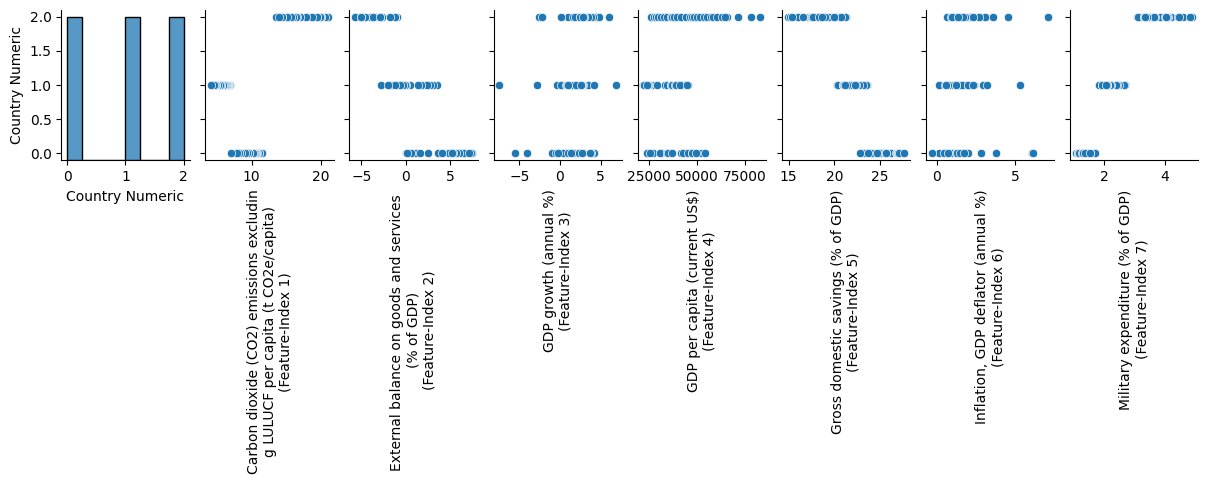

In [31]:
pg = sns.pairplot(data_melt_pivot_pdf.drop(columns=['Country Code', 'Year']), y_vars=['Country Numeric'])

i = 0

for ax in pg.axes.flatten().tolist():
    xlabel=ax.get_xlabel()

    linebreak_character_len = 39
    if len(xlabel)>linebreak_character_len:
        xlabel = xlabel[:linebreak_character_len] + '\n' + xlabel[linebreak_character_len:]

    xlabel = xlabel + '\n(Feature-Index ' + str(i) + ')'

    if i >= 1:
        ax.set_xlabel(xlabel=xlabel, rotation=90)

    i = i + 1

pg.fig.set_size_inches(12, 2)
pg.fig.set_dpi = 400
plt.show()

In [32]:
data_melt_pivot_FRA_pdf.drop(columns=['Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP growth (annual %),GDP per capita (current US$),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP)
Series Name,,,,,,,,,
Country Numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,-0.933344,-0.895056,-0.172985,0.844142,-0.433196,0.292127,-0.787631
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),NaN,-0.933344,1.000000,0.854971,0.287179,-0.752826,0.558192,-0.306977,0.553338
External balance on goods and services (% of GDP),NaN,-0.895056,0.854971,1.000000,0.243650,-0.915875,0.574303,-0.332307,0.681781
GDP growth (annual %),NaN,-0.172985,0.287179,0.243650,1.000000,-0.174647,0.484703,-0.179666,0.016123
GDP per capita (current US$),NaN,0.844142,-0.752826,-0.915875,-0.174647,1.000000,-0.528500,0.184825,-0.743333
Gross domestic savings (% of GDP),NaN,-0.433196,0.558192,0.574303,0.484703,-0.528500,1.000000,0.077839,0.089907
"Inflation, GDP deflator (annual %)",NaN,0.292127,-0.306977,-0.332307,-0.179666,0.184825,0.077839,1.000000,-0.077950
Military expenditure (% of GDP),NaN,-0.787631,0.553338,0.681781,0.016123,-0.743333,0.089907,-0.077950,1.000000


In [33]:
data_melt_pivot_DEU_pdf.drop(columns=['Country Code']).corr()

data_melt_pivot_DEU_pdf.shape

(31, 10)

In [34]:
data_melt_pivot_USA_pdf.drop(columns=['Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP growth (annual %),GDP per capita (current US$),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP)
Series Name,,,,,,,,,
Country Numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,-0.936161,-0.266353,-0.254424,0.979945,-0.424172,0.287526,-0.125913
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),NaN,-0.936161,1.000000,-0.016445,0.294837,-0.915990,0.327460,-0.230787,0.054994
External balance on goods and services (% of GDP),NaN,-0.266353,-0.016445,1.000000,0.141384,-0.254320,0.593650,-0.285386,-0.170624
GDP growth (annual %),NaN,-0.254424,0.294837,0.141384,1.000000,-0.180142,0.536811,0.290962,-0.385145
GDP per capita (current US$),NaN,0.979945,-0.915990,-0.254320,-0.180142,1.000000,-0.345710,0.424849,-0.180448
Gross domestic savings (% of GDP),NaN,-0.424172,0.327460,0.593650,0.536811,-0.345710,1.000000,0.008214,-0.688053
"Inflation, GDP deflator (annual %)",NaN,0.287526,-0.230787,-0.285386,0.290962,0.424849,0.008214,1.000000,-0.161939
Military expenditure (% of GDP),NaN,-0.125913,0.054994,-0.170624,-0.385145,-0.180448,-0.688053,-0.161939,1.000000


In [35]:
data_melt_pivot_pdf.drop(columns=['Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP growth (annual %),GDP per capita (current US$),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP)
Series Name,,,,,,,,,
Country Numeric,1.000000e+00,-3.381788e-15,0.617929,-0.848702,0.255064,0.315114,-0.907978,0.159281,0.925129
Year,-3.381788e-15,1.000000e+00,-0.253203,-0.001574,-0.155851,0.797672,-0.015571,0.349626,-0.096118
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),6.179286e-01,-2.532025e-01,1.000000,-0.521349,0.282822,0.203408,-0.556152,0.127424,0.734291
External balance on goods and services (% of GDP),-8.487021e-01,-1.574434e-03,-0.521349,1.000000,-0.161239,-0.262680,0.894813,-0.202084,-0.794387
GDP growth (annual %),2.550640e-01,-1.558515e-01,0.282822,-0.161239,1.000000,-0.003076,-0.067296,-0.011344,0.192127
GDP per capita (current US$),3.151136e-01,7.976719e-01,0.203408,-0.262680,-0.003076,1.000000,-0.316831,0.433135,0.277178
Gross domestic savings (% of GDP),-9.079785e-01,-1.557067e-02,-0.556152,0.894813,-0.067296,-0.316831,1.000000,-0.108026,-0.906321
"Inflation, GDP deflator (annual %)",1.592810e-01,3.496261e-01,0.127424,-0.202084,-0.011344,0.433135,-0.108026,1.000000,0.169073
Military expenditure (% of GDP),9.251291e-01,-9.611756e-02,0.734291,-0.794387,0.192127,0.277178,-0.906321,0.169073,1.000000


## Plot Indicators over Time

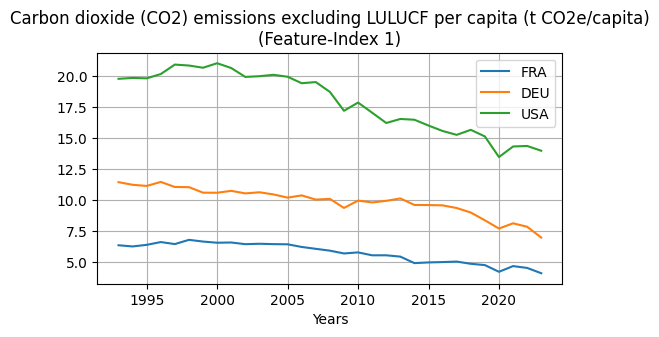

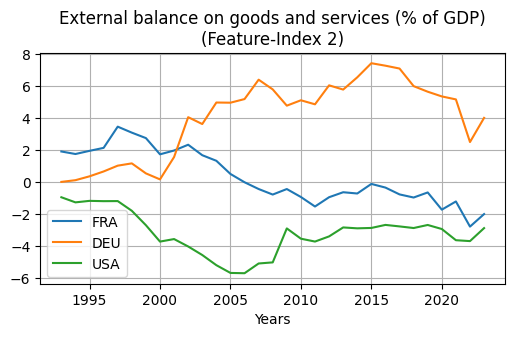

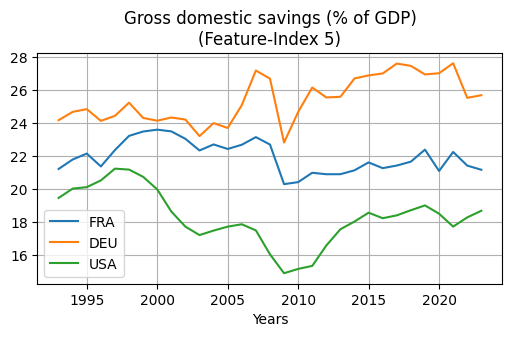

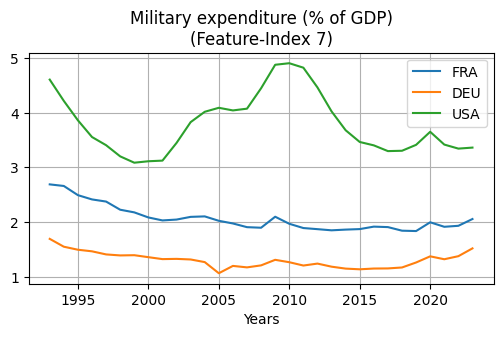

In [36]:
def plot_indicators_over_time(ax, data_melt_pivot_pdf, indicator_name, index):

    data_melt_pivot_FRA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='FRA']
    data_melt_pivot_DEU_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='DEU']
    data_melt_pivot_USA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='USA']

    ax.plot(data_melt_pivot_FRA_pdf['Year'], data_melt_pivot_FRA_pdf[indicator_name], label='FRA')
    ax.plot(data_melt_pivot_DEU_pdf['Year'], data_melt_pivot_DEU_pdf[indicator_name], label='DEU')
    ax.plot(data_melt_pivot_USA_pdf['Year'], data_melt_pivot_USA_pdf[indicator_name], label='USA')

    axis.set_title(f'{indicator_name}\n(Feature-Index {index})')
    ax.set_xlabel('Years')
    ax.legend()
    ax.grid()



column_to_plot_1 = 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'
column_to_plot_2 = 'External balance on goods and services (% of GDP)'
column_to_plot_3 = 'GDP growth (annual %)'
column_to_plot_4 = 'GDP per capita (current US$)'
column_to_plot_5 = 'Gross domestic savings (% of GDP)'
column_to_plot_6 = 'Inflation, GDP deflator (annual %)'
column_to_plot_7 = 'Military expenditure (% of GDP)'

width = 6
height = 3

fig, ax = plt.subplots(1,1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_melt_pivot_pdf, column_to_plot_1, 1)

fig, ax = plt.subplots(1,1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_melt_pivot_pdf, column_to_plot_2, 2)

fig, ax = plt.subplots(1,1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_melt_pivot_pdf, column_to_plot_5, 5)

fig, ax = plt.subplots(1,1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_melt_pivot_pdf, column_to_plot_7, 7)


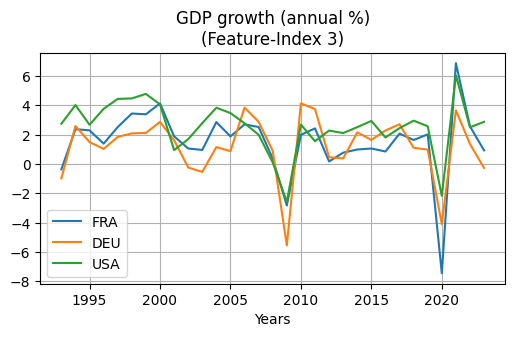

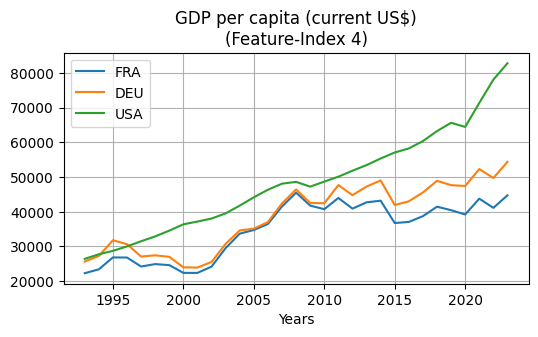

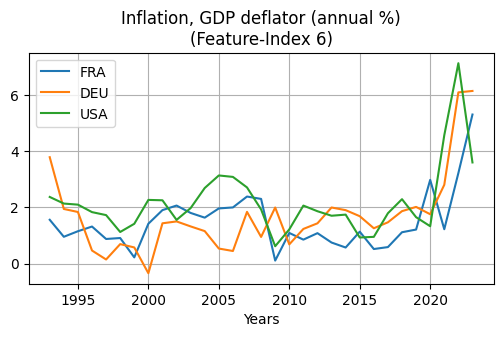

In [37]:

fig, ax = plt.subplots(1,1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_melt_pivot_pdf, column_to_plot_3, 3)

fig, ax = plt.subplots(1,1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_melt_pivot_pdf, column_to_plot_4, 4)

fig, ax = plt.subplots(1,1, figsize=(width, height))
axis = ax
plot_indicators_over_time(axis, data_melt_pivot_pdf, column_to_plot_6, 6)


# Modelling, Training and Evaluation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [39]:
X = data_melt_pivot_pdf.drop(columns=['Country Code', 'Country Numeric'])
y = data_melt_pivot_pdf['Country Code']

In [40]:
list(enumerate(list(X.columns)))

[(0, 'Year'),
 (1,
  'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'),
 (2, 'External balance on goods and services (% of GDP)'),
 (3, 'GDP growth (annual %)'),
 (4, 'GDP per capita (current US$)'),
 (5, 'Gross domestic savings (% of GDP)'),
 (6, 'Inflation, GDP deflator (annual %)'),
 (7, 'Military expenditure (% of GDP)')]

## Decision Trees

[Text(0.6, 0.8333333333333334, 'x[1] <= 12.471\ngini = 0.665\nsamples = 69\nvalue = [23, 21, 25]'),
 Text(0.4, 0.5, 'x[7] <= 1.765\ngini = 0.499\nsamples = 44\nvalue = [23, 21, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]'),
 Text(0.7, 0.6666666666666667, '  False')]

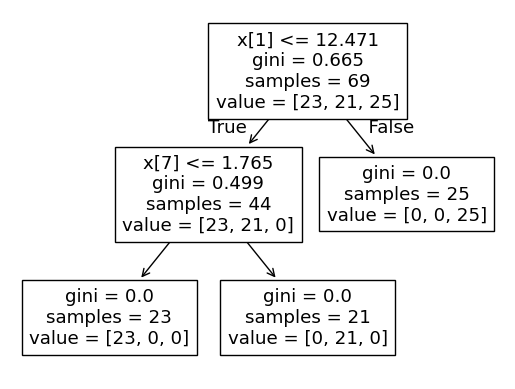

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.6, 0.8333333333333334, 'x[1] <= 12.471\ngini = 0.661\nsamples = 69\nvalue = [19, 24, 26]'),
 Text(0.4, 0.5, 'x[1] <= 7.273\ngini = 0.493\nsamples = 43\nvalue = [19, 24, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 19\nvalue = [19, 0, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]'),
 Text(0.7, 0.6666666666666667, '  False')]

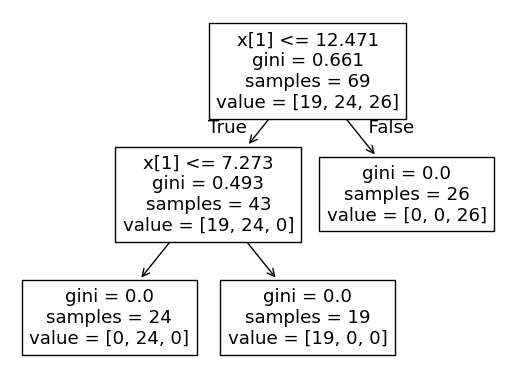

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.4, 0.8333333333333334, 'x[1] <= 6.91\ngini = 0.666\nsamples = 69\nvalue = [22.0, 24.0, 23.0]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[5] <= 22.013\ngini = 0.5\nsamples = 45\nvalue = [22, 0, 23]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0]')]

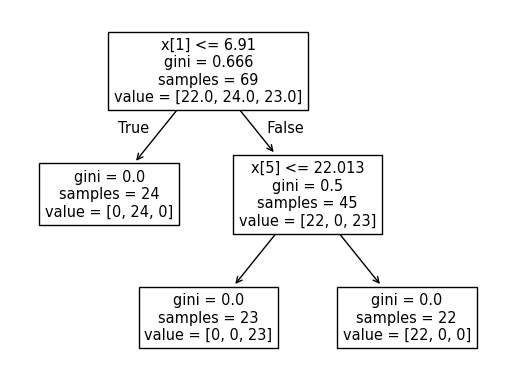

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.4, 0.8333333333333334, 'x[7] <= 1.765\ngini = 0.665\nsamples = 69\nvalue = [24, 24, 21]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[7] <= 2.888\ngini = 0.498\nsamples = 45\nvalue = [0, 24, 21]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21]')]

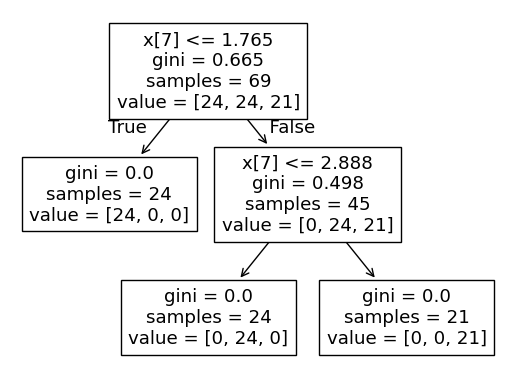

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.4, 0.8333333333333334, 'x[1] <= 6.91\ngini = 0.665\nsamples = 69\nvalue = [23, 25, 21]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 12.717\ngini = 0.499\nsamples = 44\nvalue = [23, 0, 21]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21]')]

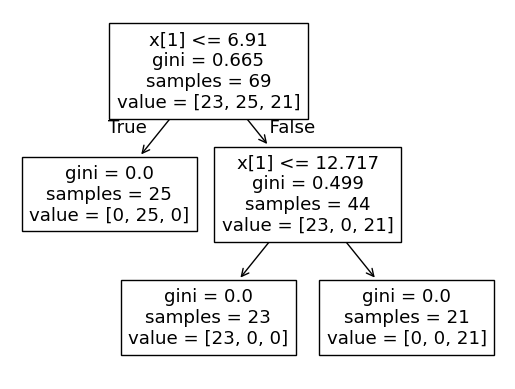

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=503)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

[Text(0.4, 0.8333333333333334, 'x[7] <= 1.765\ngini = 0.666\nsamples = 69\nvalue = [24.0, 22.0, 23.0]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 10.145\ngini = 0.5\nsamples = 45\nvalue = [0, 22, 23]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]')]

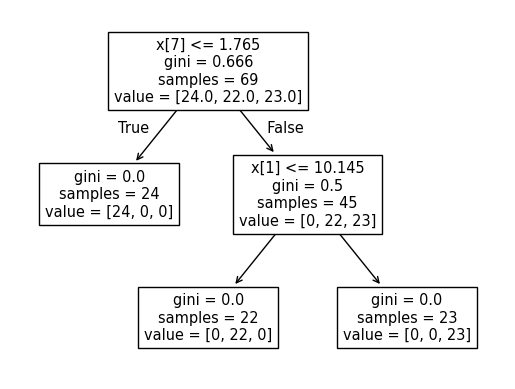

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=888)
country_classifier_model = DecisionTreeClassifier(max_depth=10)
country_classifier_model.fit(X_train, y_train)
plot_tree(country_classifier_model)

## Calculate Scores

In [47]:
y_pred = country_classifier_model.predict(X_test)

In [48]:
print(f'accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'recall: {recall_score(y_pred=y_pred, y_true=y_test, average='macro')}')
print(f'f1: {f1_score(y_pred=y_pred, y_true=y_test, average='macro')}')
print(f'precision: {precision_score(y_pred=y_pred, y_true=y_test, average='macro')}')

accuracy: 1.0
recall: 1.0
f1: 1.0
precision: 1.0
